In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [5]:

dtypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtype": dtypes, "num_unique": n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [6]:
from preproccessing.chk_type import check_type
check_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unique,2,3,2,88,7,7,248,147,3


In [7]:
cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
df[cols] = df[cols].astype('category')

In [8]:
from preproccessing.chk_type import check_type
check_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,str,category
num_unique,2,3,2,88,7,7,248,147,3


In [9]:
def handle_types(cols):
    df[cols] = df[cols].astype('category')
    chk_type(df)

In [10]:
null = df.isnull().sum()
ratio =null/df.shape[0]
pd.DataFrame({"NULL": null, "ratio": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
NULL,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [11]:
df = df.dropna(subset = ['Embarked'])   #DROP RAWS



In [12]:
df = df.drop('Cabin',axis = 1) #drop columns

In [13]:
median = df['Age'].median()
df.fillna({'Age': median}, inplace=True)

null = df.isnull().sum()
ratio = null/df.shape[0]
pd.DataFrame({"NULL": null, "ratio": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
NULL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked    category
dtype: object

In [18]:
num_cols = ['Age','Fare']

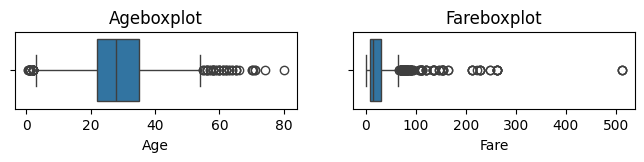

In [19]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(df[col],orient = 'h')
    plt.title(f"{col}boxplot")
plt.show()

In [20]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)   #quantile automatic calculate Q2
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 -1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    lower_Outliers = df[df[col]<lower_fence][col].values
    upper_Outliers = df[df[col]>upper_fence][col].values
    df.replace(
        {col: dict.fromkeys(df.loc[df[col] < lower_fence, col], lower_fence)},
        inplace=True
    )

    df.replace(
        {col: dict.fromkeys(df.loc[df[col] > upper_fence, col], upper_fence)},
        inplace=True
    )

In [21]:
df.duplicated().sum()

np.int64(129)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

np.int64(0)

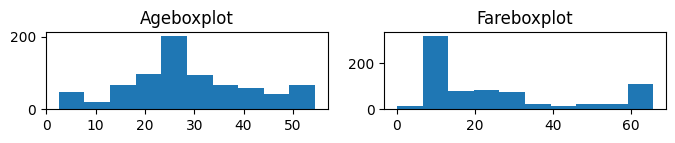

In [24]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col])
    plt.title(f"{col}boxplot")
plt.show()

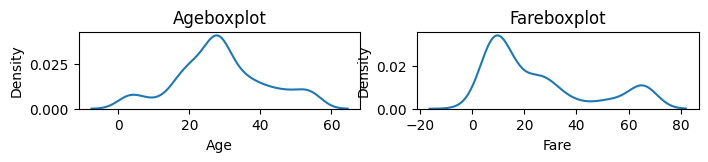

In [25]:

num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col}boxplot")
plt.show()

In [26]:
cat_cols = df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='str')

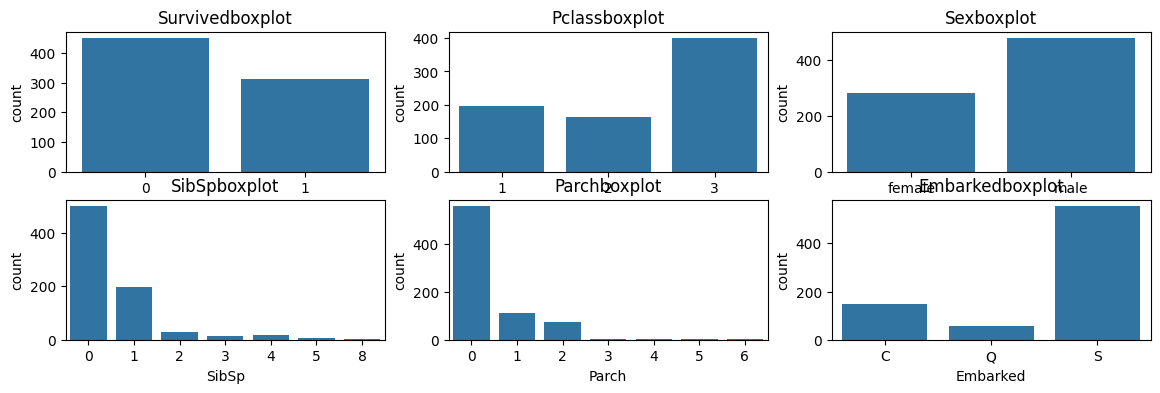

In [27]:
cat_cols = df.select_dtypes('category').columns
plt.figure(figsize=(14,4))
for i,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col,data = df)
    plt.title(f"{col}boxplot")
plt.show()

In [28]:
cat_cols = df.select_dtypes('category').columns

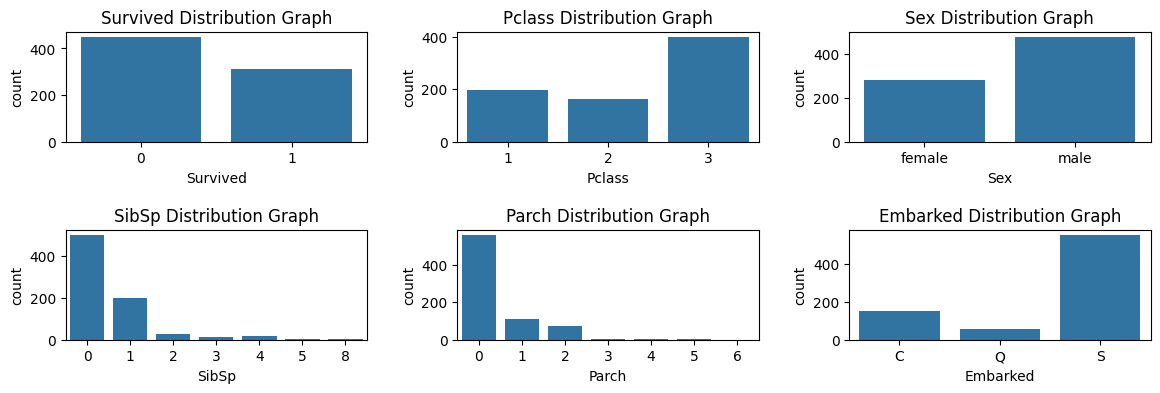

In [29]:
plt.figure(figsize=(14,4))
for i,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col,data=df)  #function to draw bar graph
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.8,wspace=0.3)  #adjust space between each graph
plt.show()

In [30]:
unique = df['Survived'].value_counts()
count = unique.values
categories = unique.index


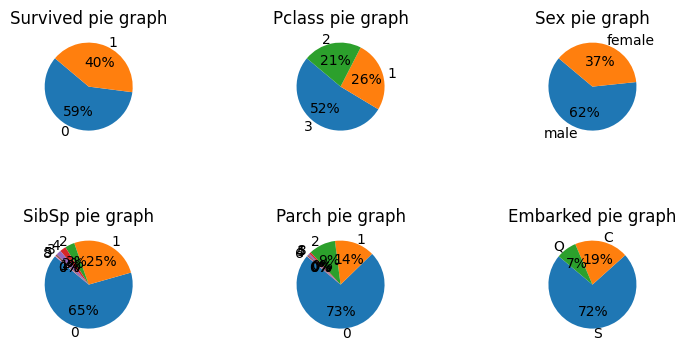

In [31]:
plt.figure(figsize=(9,4))
for i,col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count,labels=categories,startangle=140,autopct='%1.1d%%')
    plt.title(f"{col} pie graph")
    plt.subplots_adjust(hspace=0.8,wspace=0.3)
plt.show()
    

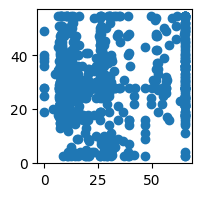

In [32]:
plt.figure(figsize=(2,2))
plt.scatter(df['Fare'],df['Age'])

In [33]:
corr = df[['Age','Fare']].corr()
corr

,Age,Fare
Age,1.000000,0.148527
Fare,0.148527,1.000000


In [34]:
corr = df.select_dtypes(include='number').corr()
corr

,Age,Fare
Age,1.000000,0.148527
Fare,0.148527,1.000000


In [35]:
agg = df.pivot_table(index='Survived',columns='Sex',values='Age',aggfunc=len)
agg

Sex,female,male
Survived,,
0,76,373
1,207,104


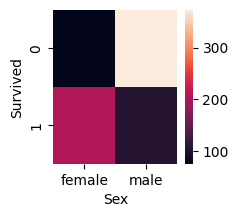

In [36]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index='Survived',columns='Sex',values='Age',aggfunc=len)
sns.heatmap(agg)
plt.show()

In [37]:
x = df.drop('Survived',axis= 1)   #x=all fetures except target
y = df['Survived'] 
  # the best way to split is to use iloc[]

In [38]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

In [40]:
pip install category-encoders


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
str_cols = ['Sex','Embarked']

In [42]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(cols=str_cols, drop_invariant=True)
X = encoder.fit_transform(x)


In [43]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
px.pie(df,names='Survived',
       title='<b>SurvivedDistribution</b>',
       color_discrete_sequence=px.colors.qualitative.)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'Survived=%{label}<extra></extra>',
              'labels': {'bdata': ('AAEBAQAAAAABAQEBAAAAAQABAAEAAQ' ... 'ABAQABAQAAAQEAAQEAAAAAAQABAA=='),
                         'dtype': 'i1'},
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': '<b>SurvivedDistribution</b>'}}
})